In [4]:
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import StringIO
from io import BytesIO
from __future__ import division

In [40]:
response = requests.get('http://www.freeiconspng.com/uploads/albert-einstein-png-8.png')
einstein_arr = np.array(Image.open(BytesIO(response.content)))

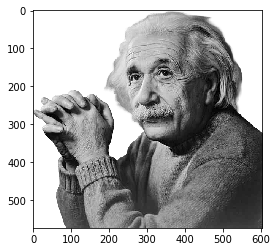

In [41]:
plt.imshow(einstein_arr)



In [42]:
print (einstein_arr.shape)
print (np.array_equal(einstein_arr[:, :, 0], einstein_arr[:, :, 1]))
print (np.array_equal(einstein_arr[:, :, 1], einstein_arr[:, :, 2]))

(574, 605, 4)
True
True


In [43]:
einstein_arr = einstein_arr[:,:,0]

In [44]:
print (einstein_arr.shape)

(574, 605)


In [45]:
einstein_arr[:200,:400]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ..., 
       [  0,   0,   0, ..., 130, 114,  96],
       [  0,   0,   0, ..., 126, 124, 117],
       [  0,   0,   0, ..., 110, 119, 120]], dtype=uint8)

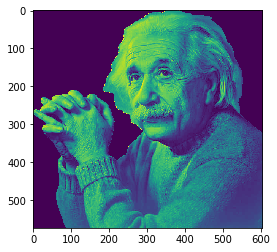

In [46]:
plt.imshow(einstein_arr)



In [47]:
padded_array = np.pad(einstein_arr, (1, 1), 'constant')
kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
output_array = np.zeros(einstein_arr.shape)

for i in range(padded_array.shape[0]-2):
    for j in range(padded_array.shape[1]-2):
        temp_array = padded_array[i:i+3, j:j+3]
        output_array[i, j] = np.sum(temp_array*kernel)

In [48]:
print (padded_array)

[[ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 81 82  0]
 [ 0  0  0 ..., 72 72  0]
 [ 0  0  0 ...,  0  0  0]]


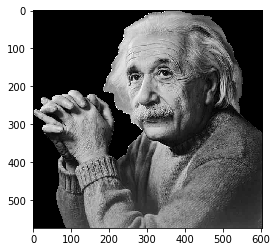

In [49]:
plt.imshow(output_array, cmap = plt.get_cmap('gray'))


In [50]:
def squash_pixel_value(value):
    if value < 0:
        return 0
    elif value < 255:
        return value
    else:
        return 255

def conv_2d_kernel(image_array_2d, kernel, squash_pixels = True):
    padded_array = np.pad(image_array_2d, (1, 1), 'constant')
    
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    
    transformed_array = np.zeros(image_array_2d.shape)
 
    for i in range(padded_array.shape[0] - kernel_width + 1):
        for j in range(padded_array.shape[1] - kernel_height + 1):
            temp_array = padded_array[i:i+kernel_width, j:j+kernel_height]
            #print temp_array.shape
            if squash_pixels:
                transformed_array[i, j] = squash_pixel_value(np.sum(temp_array*kernel))
            else:
                transformed_array[i, j] = np.sum(temp_array*kernel)
    return transformed_array

In [51]:
edge_kernel_1 = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])

edge_kernel_2 = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])

edge_kernel_3 = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

einstein_transf_edge1 = conv_2d_kernel(einstein_arr, kernel = edge_kernel_1, squash_pixels = True)
einstein_transf_edge2 = conv_2d_kernel(einstein_arr, kernel = edge_kernel_2, squash_pixels = True)
einstein_transf_edge3 = conv_2d_kernel(einstein_arr, kernel = edge_kernel_3, squash_pixels = True)

(-0.5, 604.5, 573.5, -0.5)

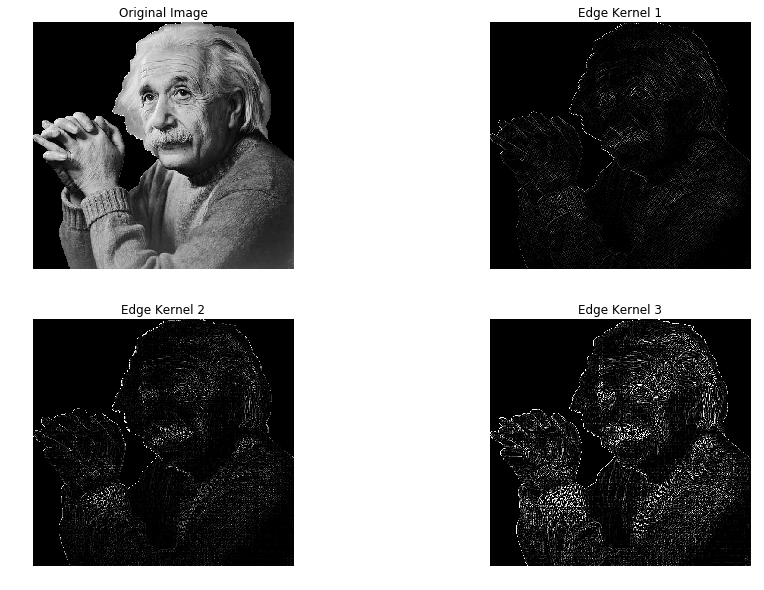

In [52]:
f, ax_array = plt.subplots(2, 2)
f.set_figheight(10)
f.set_figwidth(15)
ax_array[0, 0].imshow(einstein_arr, cmap = plt.get_cmap('gray'))
ax_array[0, 0].set_title('Original Image')
ax_array[0, 0].axis('off')
ax_array[0, 1].imshow(einstein_transf_edge1, cmap = plt.get_cmap('gray'))
ax_array[0, 1].set_title('Edge Kernel 1')
ax_array[0, 1].axis('off')
ax_array[1, 0].imshow(einstein_transf_edge2, cmap = plt.get_cmap('gray'))
ax_array[1, 0].set_title('Edge Kernel 2')
ax_array[1, 0].axis('off')
ax_array[1, 1].imshow(einstein_transf_edge3, cmap = plt.get_cmap('gray'))
ax_array[1, 1].set_title('Edge Kernel 3')
ax_array[1, 1].axis('off')

In [53]:
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

unsharp_kernel = np.array([[1, 4, 6, 4, 1],
                           [4, 16, 24, 16, 4],
                           [6, 24, -476, 24, 6],
                           [4, 16, 24, 16, 4],
                           [1, 4, 6, 4, 1]]) / -256

einstein_transf_sharpen = conv_2d_kernel(einstein_arr, kernel = sharpen_kernel, squash_pixels = True)
einstein_transf_unsharp = conv_2d_kernel(einstein_arr, kernel = unsharp_kernel, squash_pixels = True)

(-0.5, 604.5, 573.5, -0.5)

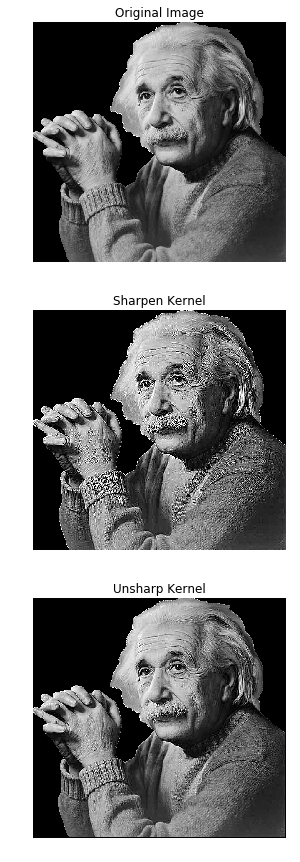

In [54]:
f, ax_array = plt.subplots(3, 1)
f.set_figheight(15)
f.set_figwidth(12)
ax_array[0].imshow(einstein_arr, cmap = plt.get_cmap('gray'))
ax_array[0].set_title('Original Image')
ax_array[0].axis('off')
ax_array[1].imshow(einstein_transf_sharpen, cmap = plt.get_cmap('gray'))
ax_array[1].set_title('Sharpen Kernel')
ax_array[1].axis('off')
ax_array[2].imshow(einstein_transf_unsharp, cmap = plt.get_cmap('gray'))
ax_array[2].set_title('Unsharp Kernel')
ax_array[2].axis('off')

In [55]:
blur_box_kernel = np.ones((3, 3)) / 9
blur_gaussian_kernel = np.array([[1,2,1],
                                 [2,4,2],
                                 [1,2,1]]) / 16

einstein_transf_blur_box = conv_2d_kernel(einstein_arr, kernel = blur_box_kernel, squash_pixels = True)
einstein_transf_blur_gaussian = conv_2d_kernel(einstein_arr, kernel = blur_gaussian_kernel, squash_pixels = True)

(-0.5, 604.5, 573.5, -0.5)

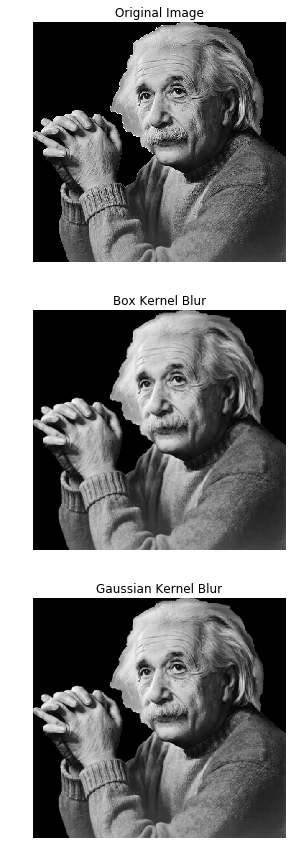

In [56]:
f, ax_array = plt.subplots(3, 1)
f.set_figheight(15)
f.set_figwidth(12)

ax_array[0].imshow(einstein_arr, cmap = plt.get_cmap('gray'))
ax_array[0].set_title('Original Image')
ax_array[0].axis('off')
ax_array[1].imshow(einstein_transf_blur_box, cmap = plt.get_cmap('gray'))
ax_array[1].set_title('Box Kernel Blur')
ax_array[1].axis('off')
ax_array[2].imshow(einstein_transf_blur_gaussian, cmap = plt.get_cmap('gray'))
ax_array[2].set_title('Gaussian Kernel Blur')
ax_array[2].axis('off')